In [11]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [12]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [13]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [14]:
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


## Life Ladder (Measure Happiness) 

Thriving (9-6) — wellbeing that is strong, consistent, and progressing. Respondents have positive views of their present life situation and have positive views of the next five years. They report significantly fewer health problems, fewer sick days, less worry, stress, sadness, anger, and more happiness, enjoyment, interest, and respect.

Struggling (5-3) — wellbeing that is moderate or inconsistent. These respondents have moderate views of their present life situation OR moderate OR negative views of their future. They are either struggling in the present, or expect to struggle in the future. Usually, they report more daily stress and worry about money than the “thriving” respondents, and more than double the amount of sick days. Also, they are more likely to smoke, and are less likely to eat healthy.

Suffering (2-0) — wellbeing that is at high risk. These respondents have poor ratings of their current life situation AND negative views of the next five years. They are more likely to report lacking the basics of food and shelter, more likely to have physical pain, a lot of stress, worry, sadness, and anger. They have less access to health insurance and care, and more than double the disease burden, in comparison to “thriving” respondents.

In [15]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,0.692602,1.552104,1.880688,0.268986,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,0.758395,1.482865,2.119374,0.307928,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,NaN,NaN,1.789670,0.257740,North America


#### Filter data set to only include countries that have data for all 3 years

In [16]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if length matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

## Gini 

the Gini coefficient, the Gini index, Gini ratio

-measure the income inequality or wealth inequality within a nation or any other group of people. It was developed by the Italian statistician and sociologist Corrado Gini.

- 0 : perfect equality 
- 1 : maximal inequality 

In [17]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


## Understand log GDP first 

log formula: x = e^y 
log GDP does not represent the growth of GDP itself instead log GDP is just an absolute value converted from actual value using log. 

advantage: 
- to linearize  regression 
- to make outliers to be in the range 
- to make the bad data to be seemed alright 

In [18]:
#Data set with the countries that have data for all 3 years 
len(Final_df)

387

# Gini, log GDP and Happiness

In [19]:
gini_index_2015 = gini_index_2015.rename(columns={"Life Ladder" : "Happiness Score"})

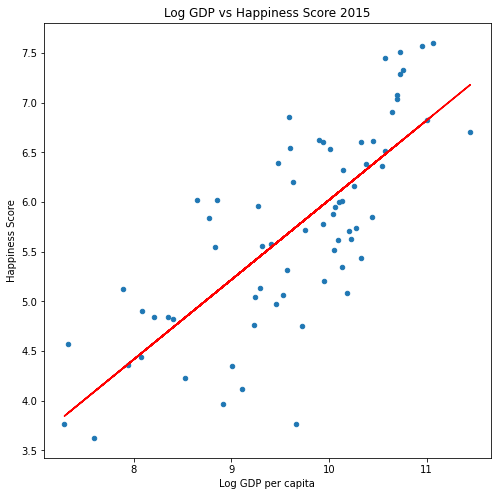

The r-value is 0.7619276931775728
The p-value is 1.8599268883551808e-14


In [20]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gdp = gini_index_2015.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))

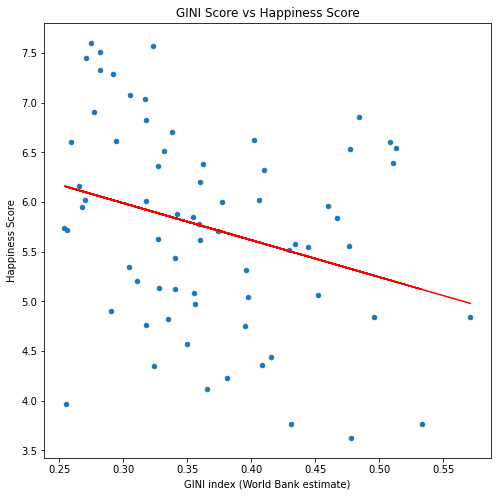

The r-value is -0.29170169576761745
The p-value is 0.014279697472189481


In [21]:
# Scatter plot for GINI vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="GINI index (World Bank estimate)", y="Happiness Score", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gini = gini_index_2015.iloc[:, 14]
correlation = st.pearsonr(gini, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gini, happiness)
regress_values = gini * slope + intercept

plt.plot(gini,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))

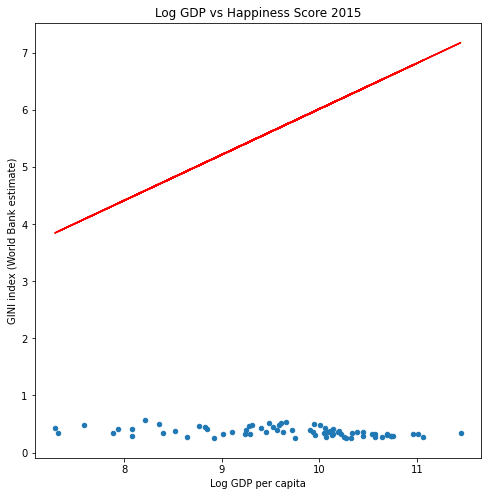

The r-value is 0.7619276931775728
The p-value is 1.8599268883551808e-14


In [41]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Log GDP per capita", y="GINI index (World Bank estimate)", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gdp = gini_index_2015.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))


The r-value is -0.29170169576761745
The p-value is 0.014279697472189481


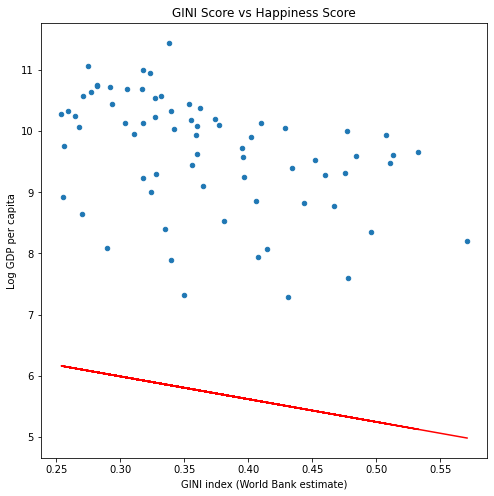

In [22]:
#log GDP vs. GINI with seaborn

# Scatter plot for GINI vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="GINI index (World Bank estimate)", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="GINI vs. GDP")

#Calculate the correlation coefficient
gdp = gini_index_2015.iloc[:, 3]
gini = gini_index_2015.iloc[:, 14]
correlation = st.pearsonr(gini,gdp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gini, happiness)
regress_values = gini * slope + intercept
xlim=(0.3,0.5)
ylim=(8,10)
plt.plot(gini,regress_values,"r-")

print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))
# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()




In [23]:
#Move gini index into a list
gini_values = gini_index_2015["GINI index (World Bank estimate)"]

#sort gini index
gini_values.sort_values()


550    0.254
628    0.255
46     0.256
145    0.259
542    0.265
       ...  
463    0.508
107    0.511
79     0.513
72     0.533
661    0.571
Name: GINI index (World Bank estimate), Length: 70, dtype: float64

In [24]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = gini_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 0.3125
The upper quartile is: 0.41374999999999995
The interquartile is: 0.10124999999999995
The the median is: 0.3545 
Values below 0.16062500000000007 could be outliers.
Values above 0.5656249999999998 could be outliers.


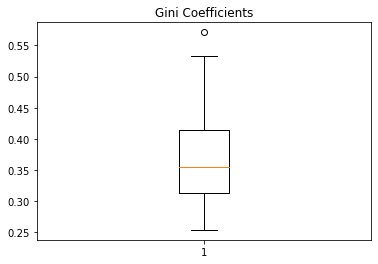

In [25]:
props = dict(linestyle='-', linewidth=30, color='k')
plt.boxplot(gini_values)
plt.title("Gini Coefficients")
plt.show()


In [26]:
equal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]<0.3125), :]
equal.count()

Country name                                         18
year                                                 18
Happiness Score                                      18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

In [27]:
unequal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]>0.41374999999999995), :]
unequal.count()

Country name                                         18
year                                                 18
Happiness Score                                      18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

0.7069238390030299
0.0010365237749207787
0.49974131415078177
y = 0.87x + -2.47


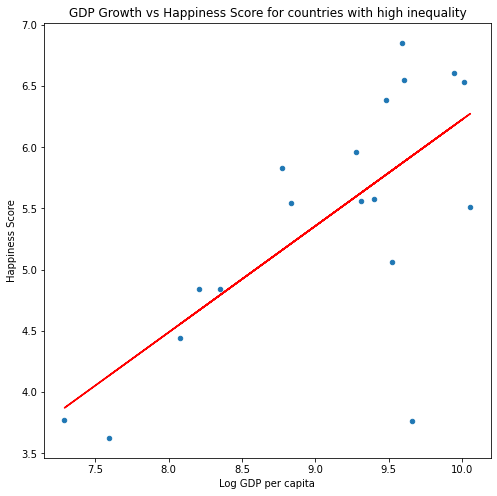

In [28]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
unequal.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with high inequality")

#Calculate the correlation coefficient
happiness = unequal.iloc[:, 2]
gdp = unequal.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(gdp,regress_values,"r-")

print(rvalue)
print(pvalue)
print(rvalue**2)
print(line_eq)

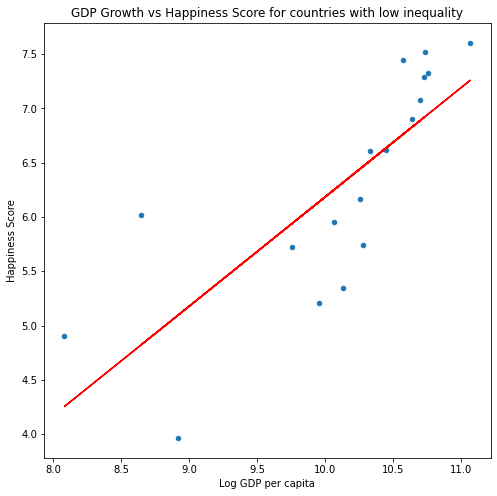

0.7843216387055078
0.00011661863136819774
0.615160432941693
y = 1.01x + -3.87


In [29]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
equal.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with low inequality")

#Calculate the correlation coefficient
happiness = equal.iloc[:, 2]
gdp = equal.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)
print(pvalue)
print(rvalue**2)
print(line_eq)

In [30]:
equal.mean()

year                                                 2015.000000
Happiness Score                                         6.299444
Log GDP per capita                                     10.114158
Social support                                          0.902184
Healthy life expectancy at birth                       68.644445
Freedom to make life choices                            0.782484
Generosity                                              0.056840
Perceptions of corruption                               0.646959
Positive affect                                         0.724620
Democratic Quality                                      0.603295
Delivery Quality                                        0.764709
Standard deviation of ladder by country-year            1.777431
Standard deviation/Mean of ladder by country-year       0.293756
GINI index (World Bank estimate)                        0.278333
dtype: float64

In [31]:
unequal.mean()

year                                                 2015.000000
Happiness Score                                         5.404142
Log GDP per capita                                      9.055190
Social support                                          0.793130
Healthy life expectancy at birth                       62.688889
Freedom to make life choices                            0.793363
Generosity                                             -0.049134
Perceptions of corruption                               0.805305
Positive affect                                         0.746518
Democratic Quality                                     -0.026220
Delivery Quality                                       -0.224817
Standard deviation of ladder by country-year            2.387642
Standard deviation/Mean of ladder by country-year       0.459477
GINI index (World Bank estimate)                        0.476611
dtype: float64

## Investigate futher to see the impact of Gini 

group 1) low gini & low gdp 
group 2) low gini & high gdp 
group 3) high gini & low gdp 
group 4) high gini & high gdp 


In [32]:
#Divde into 4 groups to see the relationship with happiness/ used 'mean' values for both indicators
group_1 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_2 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] >= 9.27), :]
group_3 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_4 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] > 9.27), :]

In [33]:
group_1_avg = group_1['Happiness Score'].mean()
group_2_avg = group_2['Happiness Score'].mean()
group_3_avg = group_3['Happiness Score'].mean()
group_4_avg = group_4['Happiness Score'].mean()

print(group_1_avg)
print(group_2_avg)
print(group_3_avg)
print(group_4_avg)

4.803574005666667
6.511840661416667
4.740749359214286
5.78066240830769


<Figure size 1440x1224 with 0 Axes>

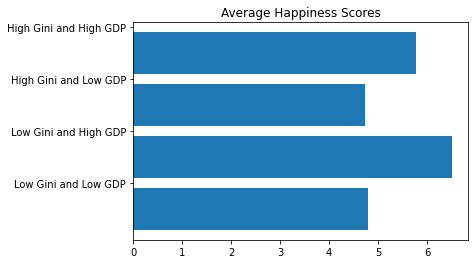

<Figure size 1440x1224 with 0 Axes>

In [40]:
values = [group_1_avg, group_2_avg, group_3_avg, group_4_avg]
y_axis = np.arange(len(values))
width = 1
plt.title("Average Happiness Scores")
tick_locations = [value for value in y_axis]
plt.yticks(tick_locations, ["Low Gini and Low GDP", "Low Gini and High GDP", "High Gini and Low GDP", "High Gini and High GDP"])
plt.xticks(rotation = 0)
plt.yticks(y_axis + width / 2, ("Low Gini and Low GDP", "Low Gini and High GDP", "High Gini and Low GDP", "High Gini and High GDP"))
plt.barh(y_axis, values)
plt.figure(figsize=(20,17))